In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Part 1: Data exploration 
# part a: load in the data

import pandas as pd
df = pd.read_csv('Assignment5_Data-1.csv')

df.head()

,x1,x2
0,-2.505828,4.231421
1,-2.015031,2.577902
2,-0.778732,3.736001
3,-1.525042,2.950457
4,-0.619687,2.703252


In [3]:
df.dtypes
df.isnull().sum().sum()

0

In [4]:
# part b: fit to a standard scalar

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the first few rows of the scaled data
df_scaled.head()

,x1,x2
0,-1.371927,-0.451673
1,-1.232381,-1.558762
2,-0.880869,-0.783374
3,-1.093064,-1.309323
4,-0.835648,-1.474836


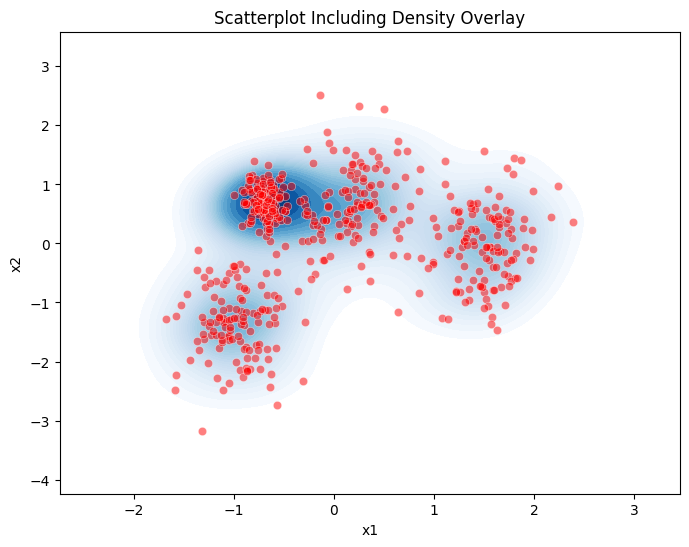

In [5]:
# Part C: Creating a joint scatterplot of the data
plt.figure(figsize=(8,6))
sns.kdeplot(x=df_scaled["x1"], y=df_scaled["x2"], fill=True, cmap="Blues", levels=30)
sns.scatterplot(x=df_scaled["x1"], y=df_scaled["x2"], color="red", alpha=0.5)
plt.title("Scatterplot Including Density Overlay")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

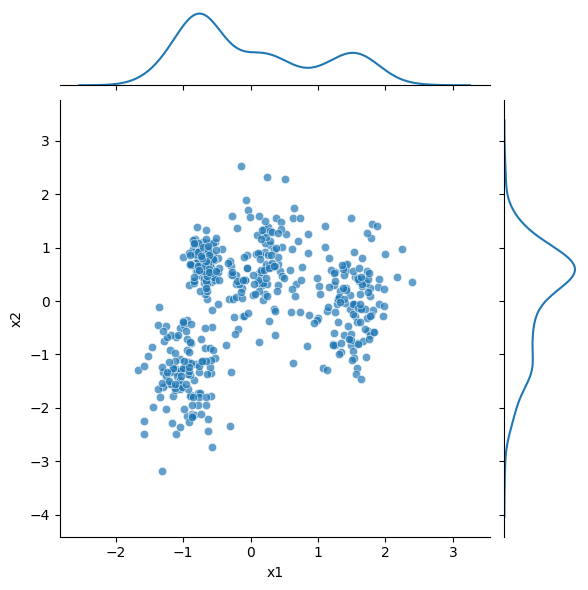

In [6]:
# Create the JointGrid plot
g = sns.JointGrid(data=df_scaled, x="x1", y="x2", height=6)
g.plot_joint(sns.scatterplot, alpha=0.7)
g.plot_marginals(sns.kdeplot)

# Show the plot
plt.show()

# Part D: Although its hard to tell I would estimate the number of clusters to be around 4 clusters, maybe 3. 
# The cluster densities are not consistent throughout the data As one cluester is very dense while the other three are not very dense at all. 

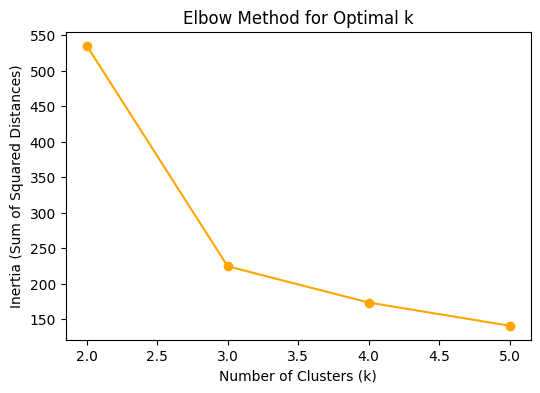

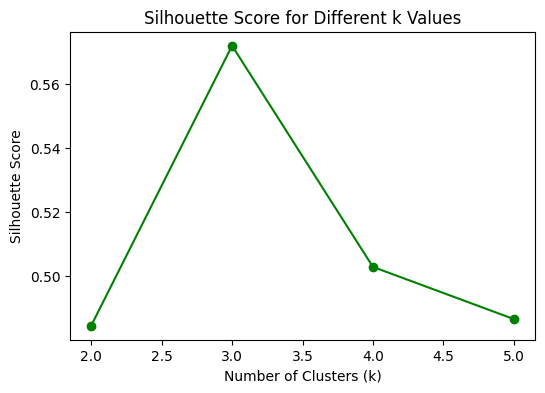

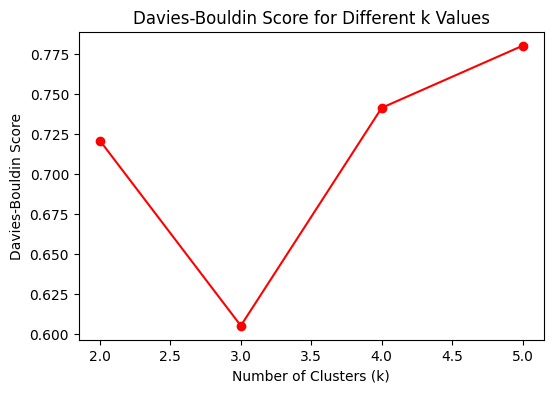

In [7]:
# Part 2: K-means clustering 
# part A and B:
# Define a range of cluster numbers
cluster_range = range(2, 6)

# Lists to store evaluation metrics
inertia_values = []
silhouette_scores = []
davies_bouldin_scores = []

# Compute metrics for different numbers of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=77, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, cluster_labels))

# Plot Elbow Method (Inertia values)
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-', color = 'orange')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color = 'green')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.show()

# Plot Davies-Bouldin Score
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, davies_bouldin_scores, marker='o', linestyle='-', color = 'red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.title("Davies-Bouldin Score for Different k Values")
plt.show()

# Part C: 

# The optimal number of clusters found from each method was as follows: the elbow method suggested 3 clusters was optimal, the silhoutte score also suggested 3 clusters, and the Davies-Bouldin score also suggested 3 was the optimal number. Therefore, we can confidently conclude that 3 clusters was the optimal number of clusters. 

In [8]:
# part d
# Fit K-Means with the optimal number of clusters (k=3)
optimal_k = 3
kmeans_best = KMeans(n_clusters=optimal_k, random_state=77, n_init=10)
df_scaled["Kmeans_Cluster"] = kmeans_best.fit_predict(df_scaled)

# Display the cluster centers
kmeans_best.cluster_centers_

array([[-0.3093413 ,  0.73557074],
       [ 1.42150085, -0.02852912],
       [-0.96374389, -1.35255378]])

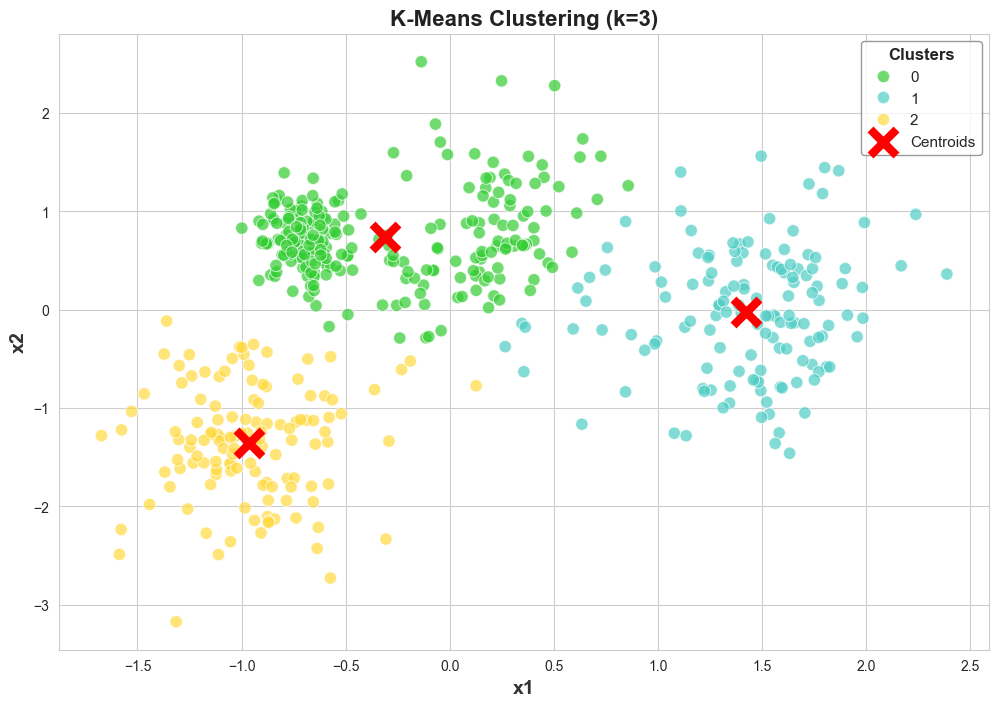

In [9]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# color palette
palette = ["#32CD32", "#4ECDC4", "#FFD93D"]

# Create a scatter plot 
sns.scatterplot(x=df_scaled["x1"], y=df_scaled["x2"], hue=df_scaled["Kmeans_Cluster"], palette=palette, alpha=0.7, s=80, marker="o")

# Plot the cluster centroids
plt.scatter(kmeans_best.cluster_centers_[:, 0], kmeans_best.cluster_centers_[:, 1], 
            s=350, c="red", marker="x", linewidths=6, label="Centroids")

# Labels, title
plt.xlabel("x1", fontsize=14, fontweight='bold', color="#333333")
plt.ylabel("x2", fontsize=14, fontweight='bold', color="#333333")
plt.title(f"K-Means Clustering (k={optimal_k})", fontsize=16, fontweight='bold', color="#222222")

#legend
legend = plt.legend(title="Clusters", fontsize=11, title_fontsize=12, loc="upper right")
legend.get_frame().set_edgecolor("gray")
legend.get_title().set_fontweight('bold')

plt.show()


In [10]:
from sklearn.mixture import GaussianMixture

# Define range for number of clusters
k_values = range(2, 11)

# Store AIC and BIC values
aic_values = []
bic_values = []

# Loop through different k values
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=77, n_init=10)
    gmm.fit(df_scaled)
    
    aic_values.append(gmm.aic(df_scaled))
    bic_values.append(gmm.bic(df_scaled))

# Find the optimal k 
optimal_k_aic = k_values[np.argmin(aic_values)]
optimal_k_bic = k_values[np.argmin(bic_values)]

print(f"Optimal k based on AIC: {optimal_k_aic}")
print(f"Optimal k based on BIC: {optimal_k_bic}")


Optimal k based on AIC: 4
Optimal k based on BIC: 4


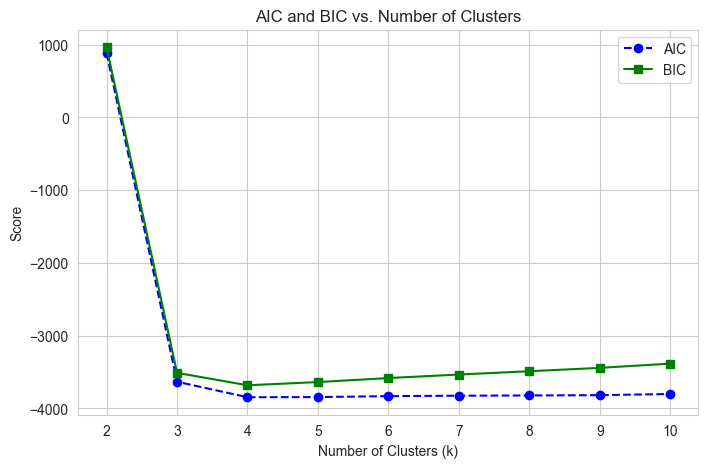

In [11]:
plt.figure(figsize=(8,5))
plt.plot(k_values, aic_values, marker='o', linestyle='--', color='b', label='AIC')
plt.plot(k_values, bic_values, marker='s', linestyle='-', color='g', label='BIC')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('AIC and BIC vs. Number of Clusters')
plt.legend()
plt.show()

# Part C: It appears both AIC and BIC have the lowest points at about 3 clusters, which differs from the lowest point of three clusters on our k means methods. Note- upon second look the lowest number may actually be 5 clusters

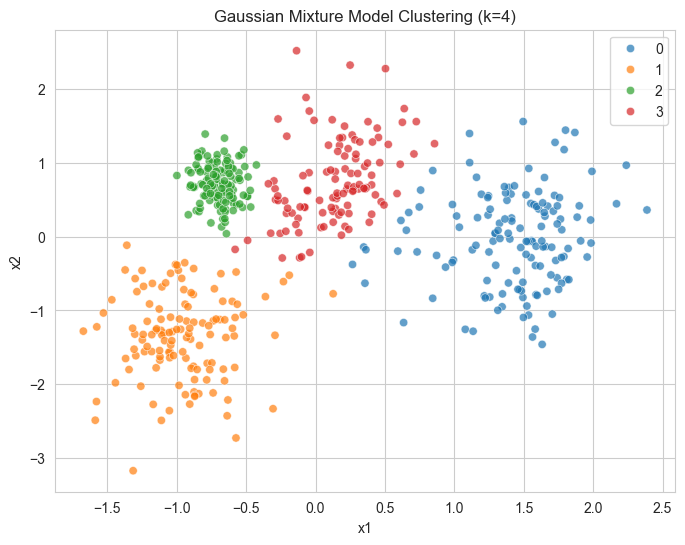

GMM Cluster counts:
 GMM_Cluster
0    137
2    127
1    126
3    110
Name: count, dtype: int64


In [12]:
# Choose the optimal k 
best_k_gmm = optimal_k_bic  

# Fit GMM with the optimal number of clusters
gmm_best = GaussianMixture(n_components=best_k_gmm, random_state=77, n_init=10)
df_scaled["GMM_Cluster"] = gmm_best.fit_predict(df_scaled)

# Plot GMM Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled["x1"], y=df_scaled["x2"], hue=df_scaled["GMM_Cluster"], palette="tab10", alpha=0.7)
plt.title(f"Gaussian Mixture Model Clustering (k={best_k_gmm})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# Display cluster counts
print("GMM Cluster counts:\n", df_scaled["GMM_Cluster"].value_counts())


In [13]:
# Part 4 DBSCAN 
#part A: finding num of dimensions

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Determine number of dimensions in the dataset
num_dimensions = df_scaled.shape[1]  
min_samples = num_dimensions + 1  # Rule of thumb: dimensions + 1

print(f"Selected min_samples: {min_samples}")

Selected min_samples: 5


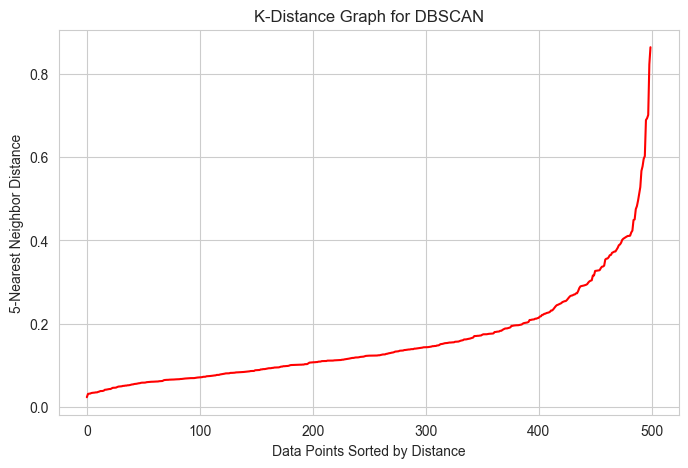

In [14]:
# Compute k-nearest neighbors distances
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Sort the distances and plot
sorted_distances = np.sort(distances[:, -1])  

plt.figure(figsize=(8,5))
plt.plot(sorted_distances, linestyle="-", color="r")
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel(f"{min_samples}-Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.show()


In [15]:
# computing epsilon taking the second derivative to find the optimal point
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Extract and sort the k-th nearest neighbor distances
k_distances = distances[:, -1]
sorted_k_distances = np.sort(k_distances)

# Compute the first derivative (rate of change)
first_derivative = np.diff(sorted_k_distances)

# Compute the second derivative (rate of change of the slope)
second_derivative = np.diff(first_derivative)

# Find the index of the maximum second derivative (largest curvature change)
optimal_index = np.argmax(second_derivative) + 1  

# Get the optimal epsilon value
optimal_epsilon = sorted_k_distances[optimal_index]

# Print the exact epsilon value
print(f"Optimal epsilon (ε) for DBSCAN: {optimal_epsilon:.4f}")


Optimal epsilon (ε) for DBSCAN: 0.7012


In [16]:
# choosing epsilon for our graph
epsilon = 0.7012  

# Fit DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df_scaled["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)

# Display cluster counts
print("DBSCAN Cluster counts:\n", df_scaled["DBSCAN_Cluster"].value_counts()) 

DBSCAN Cluster counts:
 DBSCAN_Cluster
 3    137
 1    127
 0    125
 2    110
-1      1
Name: count, dtype: int64


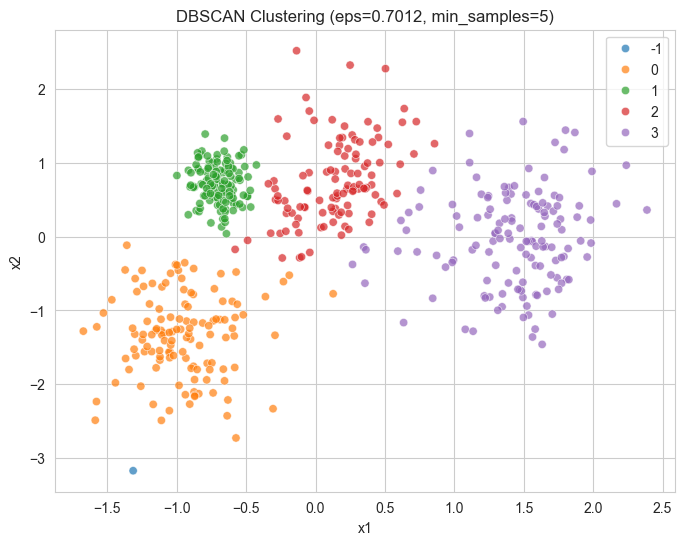

In [17]:
# DBSCAN plot including outliers
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled["x1"], y=df_scaled["x2"], hue=df_scaled["DBSCAN_Cluster"], palette="tab10", alpha=0.7)
plt.title(f"DBSCAN Clustering (eps={epsilon}, min_samples={min_samples})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [18]:
# Copy data
dbscan_df = df_scaled.copy()

# Remove outliers (where cluster = -1)
dbscan_df = dbscan_df[dbscan_df["DBSCAN_Cluster"] != -1]

# Show number of clusters without outliers
print("DBSCAN Cluster counts after removing outliers:\n", dbscan_df["DBSCAN_Cluster"].value_counts())

DBSCAN Cluster counts after removing outliers:
 DBSCAN_Cluster
3    137
1    127
0    125
2    110
Name: count, dtype: int64


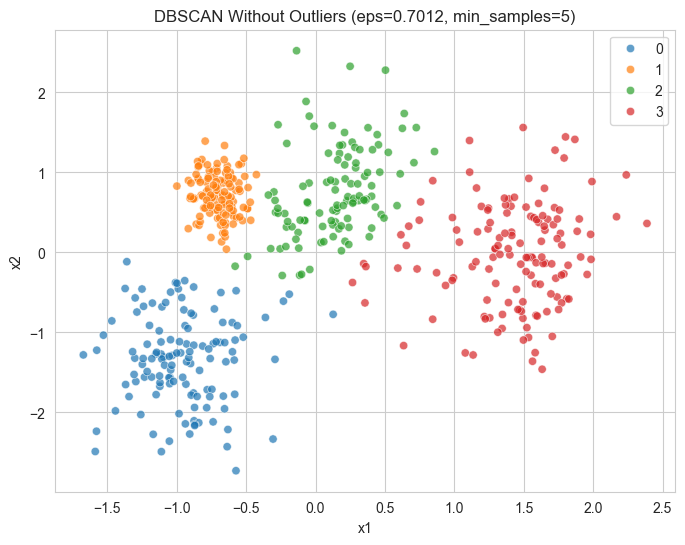

In [19]:
# plots excluding outliers
plt.figure(figsize=(8,6))
sns.scatterplot(x=dbscan_df["x1"], y=dbscan_df["x2"], hue=dbscan_df["DBSCAN_Cluster"], palette="tab10", alpha=0.7)
plt.title(f"DBSCAN Without Outliers (eps={epsilon}, min_samples={min_samples})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

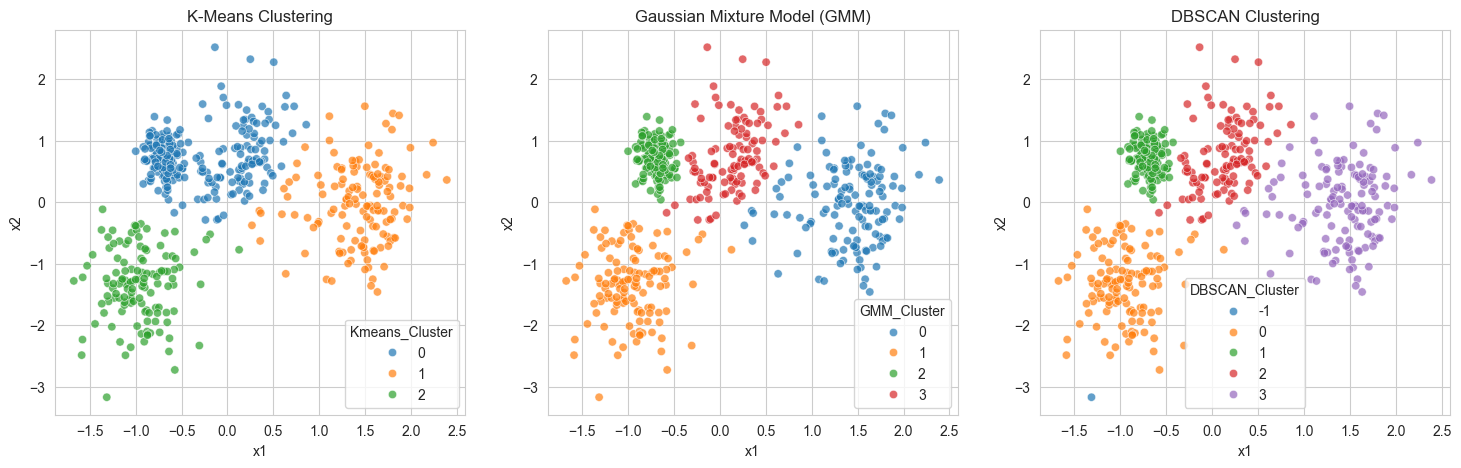

In [20]:
# Part 5: Comparing the models. 
# Part A and B: showing our graphs to compare findings and metrics 

import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means Plot
sns.scatterplot(ax=axes[0], x=df_scaled["x1"], y=df_scaled["x2"], hue=df_scaled["Kmeans_Cluster"], palette="tab10", alpha=0.7)
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")

# GMM Plot
sns.scatterplot(ax=axes[1], x=df_scaled["x1"], y=df_scaled["x2"], hue=df_scaled["GMM_Cluster"], palette="tab10", alpha=0.7)
axes[1].set_title("Gaussian Mixture Model (GMM)")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")

# DBSCAN Plot
sns.scatterplot(ax=axes[2], x=df_scaled["x1"], y=df_scaled["x2"], hue=df_scaled["DBSCAN_Cluster"], palette="tab10", alpha=0.7)
axes[2].set_title("DBSCAN Clustering")
axes[2].set_xlabel("x1")
axes[2].set_ylabel("x2")

plt.show()


In [21]:
# Part D: Gathering scores for each model; finding best model 
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_kmeans = silhouette_score(df_scaled, df_scaled["Kmeans_Cluster"])
silhouette_gmm = silhouette_score(df_scaled, df_scaled["GMM_Cluster"])
silhouette_dbscan = silhouette_score(dbscan_df, dbscan_df["DBSCAN_Cluster"])  

# Davies-Bouldin Score
db_kmeans = davies_bouldin_score(df_scaled, df_scaled["Kmeans_Cluster"])
db_gmm = davies_bouldin_score(df_scaled, df_scaled["GMM_Cluster"])
db_dbscan = davies_bouldin_score(dbscan_df, dbscan_df["DBSCAN_Cluster"])  

# Print Scores
print(f"Silhouette Score - K-Means: {silhouette_kmeans:.3f}")
print(f"Silhouette Score - GMM: {silhouette_gmm:.3f}")
print(f"Silhouette Score - DBSCAN: {silhouette_dbscan:.3f}\n")

print(f"Davies-Bouldin Score - K-Means: {db_kmeans:.3f}")
print(f"Davies-Bouldin Score - GMM: {db_gmm:.3f}")
print(f"Davies-Bouldin Score - DBSCAN: {db_dbscan:.3f}")


Silhouette Score - K-Means: 0.724
Silhouette Score - GMM: 0.727
Silhouette Score - DBSCAN: 0.728

Davies-Bouldin Score - K-Means: 0.428
Davies-Bouldin Score - GMM: 0.390
Davies-Bouldin Score - DBSCAN: 0.390


# Based on the evaluation metrics, DBSCAN performed the best overall. It achieved the highest Silhouette Score (0.728), indicating that its clusters were the most well-separated, and it tied with GMM for the lowest Davies-Bouldin Score (0.390), meaning its clusters were also the most compact and well-defined. GMM was a close second, with a nearly identical Silhouette Score (0.727) and matching Davies-Bouldin Score (0.390), suggesting that it handled overlapping clusters well. K-Means, on the other hand, performed the worst, with the lowest Silhouette Score (0.724) and the highest Davies-Bouldin Score (0.428), indicating that its clusters were less compact and more prone to overlap. These results suggest that DBSCAN is the best choice if the dataset contains irregularly shaped or varying-density clusters, while GMM may be preferable if the clusters are more probabilistic and overlapping. K-Means, though the simplest, struggles when clusters are not spherical or evenly distributed. If further improvements are needed, adjusting DBSCAN’s eps value could help refine the clustering even more.